### İsmail Ata İnan
### 2017400129

# Assignment 4 Answers

## Question 1

### a)

First, we define $A$.

In [46]:
import numpy as np

A = np.array([[1,6],[0,-1],[-1,-2]])
A

array([[ 1,  6],
       [ 0, -1],
       [-1, -2]])

We know by the **Theorem 4.14** in the book that given a $mxn$ matrix $A$, $A^T \ A$ always possesses a symmetric and positive semidefinite matrix. In addition, by the **Spectral Theorem(4.15)** in the book, we know that every symmetric and therefore square matrix $S$ has an orthonormal basis of corresponding vector space $V$ consisting of eigenvectors of $S$ and has real eigenvalues. Combining these two, we conclude $A^T \ A$ has the properties of the second theorem. We lastly use the results of **Theorem 4.20**. According to it, every square $nxn$ matrix $S$ has an eigendecomposition $PDP^{-1}$ with $P$ being an orthonormal basis and $D$ being a diagonal vector with the corresponding eigenvalues in the entries if and only if the eigenvectors of $S$ form a basis of $R^n$. Therefore, the $mxm$ matrix $A^T \ A$ has an eigendecomposition $PDP^{-1}$ just as explained in the theorem with $P$ being an orthogonal matrix.

Now, let us assume that $A$ has a singular value decomposition $U \Sigma V^T$. Then $A^TA = V \Sigma U^T U \Sigma V^T$, with $U$ and $V$ being $mxm$ and $nxn$ orthogonal vectors and $\Sigma$ being a $mxn$ kind of diagonal matrix with its entries being the singular values since $A^TA$ is square. Using these information, $A^TA = V \Sigma^2 V^T$ with $\Sigma$ is exponentiated according to the matrix exponentiation. We also showed that $A^TA$ has eigendecomposition $PDP^{-1} = PDP^T$. Then, we have $V \Sigma^2 V^T = PDP^{-1} = PDP^T$ with $P$ and $V$ both orthogonal and $\Sigma^2$ and $D$ both diagonal matrices all having the shape. Then, we can easily say that we define $V = P$ and every singular value $\sigma_i$ of $A$ is the square root of eigenvalue $\lambda_i$ of $A^TA$. Therefore, $\sigma_i^2 = \lambda_i$.

Below, I calculate $V$ and $\Sigma$ using the above facts. By convention, we sort the singular values in descending order and change the order of the columns of $V$ according to the magnitude of these correspoding singular values. Then, I form $\Sigma$ by appending $0$s to its edges and corners until it has the same shape of $A$. In our case, we have 2 singular values so we just add one row of $0$s to the bottom.

In [47]:
lambdas, V = np.linalg.eig(A.T @ A)

indices = np.flip(np.argsort(lambdas))
sigmas = np.sqrt(lambdas[indices])
V = V[:, indices]

S = np.vstack((np.diag(sigmas), np.zeros(2)))

To find $U$, we use the same ideas as $V$ in a different way. Now, we form the square symmetric $nxn$ matrix $A \ A^T$. Since it is symmetrix and square, above theorems all apply to $A \ A^T$ as well. Therefore, $AA^T$ has an eigendecomposition $AA^T = RDR^{-1} = RDR^T$. Also, we have $AA^T = U \Sigma V^T V \Sigma U^T = U \Sigma^2 U^T$. Therefore, $RDR^T = U \Sigma^2 U^T$. We have $U \Sigma^2 U^T = RDR^T$ with $R$ and $U$ both orthogonal and $\Sigma^2$ and $D$ both diagonal matrices all having the shape. So we can define $U = R$ and $\sigma_i^2 = \lambda_i$. These $\lambda$ values are indeed are the same as we found above, so our singular values are the same.

Below, I calculate $U$ using the above facts. By convention, we sort the singular values found in this decomposition in descending order and change the order of the columns of $U$ according to the magnitude of these correspoding singular values. The singular values are the same as above, so I do not change $\Sigma$.

In [48]:
lambdas2, U = np.linalg.eig(A @ A.T)
indices2 = np.flip(np.argsort(lambdas2))
U = U[:, indices2]

print('U:\n', U)
print('Sigma:\n', S)
print('V:\n', V)

U:
 [[-0.93180061  0.2760291  -0.23570226]
 [ 0.15035942 -0.2974948  -0.94280904]
 [ 0.33036293  0.9139501  -0.23570226]]
Sigma:
 [[6.52512367 0.        ]
 [0.         0.65020081]
 [0.         0.        ]]
V:
 [[-0.19343136 -0.98111381]
 [-0.98111381  0.19343136]]


We know get the singular value decomposition by using **np.linalg.svd()** and store the results in $U_2$, $\Sigma_2$ and $V_2^T$. I read the documentation of **np.linalg.svd()** and understood that it returns $V^T$ as last element, not $V$.

In [49]:
U2, sigmas2, V2_T = np.linalg.svd(A)
S2 = np.vstack((np.diag(sigmas2), np.zeros(2)))
print('U2:\n', U2)
print('Sigma2:\n', S2)
print('V2_T:\n', V2_T)

U2:
 [[ 0.93180061 -0.2760291   0.23570226]
 [-0.15035942  0.2974948   0.94280904]
 [-0.33036293 -0.9139501   0.23570226]]
Sigma2:
 [[6.52512367 0.        ]
 [0.         0.65020081]
 [0.         0.        ]]
V2_T:
 [[ 0.19343136  0.98111381]
 [ 0.98111381 -0.19343136]]


To compare the results with my answer, **np.linalg.svd()** returned $V_2^T$ as I said above but since it is $2x2$ orthogonal matrix, this did not make a difference. In addition, the the magnitude of all the entries are the same in all matrices. The only differences seems to be the signs of entries in $U_2$ and $V_2$. In that sense, $U = -U_2$ and $V = -V_2$.

### b)

To give my key idea to how to obtain the SVD of a matrix, I already stated how and why we always obtained the orthogonal matrices $U$ and $V$. Therefore, I will just copy the relevant parts of **1a** to this section to give my answer.

We know by the **Theorem 4.14** in the book that given a $mxn$ matrix $A$, $A^T \ A$ always possesses a symmetric and positive semidefinite matrix. In addition, by the **Spectral Theorem(4.15)** in the book, we know that every symmetric and therefore square matrix $S$ has an orthonormal basis of corresponding vector space $V$ consisting of eigenvectors of $S$ and has real eigenvalues. Combining these two, we conclude $A^T \ A$ has the properties of the second theorem. We lastly use the results of **Theorem 4.20**. According to it, every square $nxn$ matrix $S$ has an eigendecomposition $PDP^{-1}$ with $P$ being an orthonormal basis and $D$ being a diagonal vector with the corresponding eigenvalues in the entries if and only if the eigenvectors of $S$ form a basis of $R^n$. Therefore, the $mxm$ matrix $A^T \ A$ has always an eigendecomposition $PDP^{-1}$ just as explained in the theorem with $P$ being an orthogonal matrix.

Now, let us assume that $A$ has a singular value decomposition $U \Sigma V^T$. Then $A^TA = V \Sigma U^T U \Sigma V^T$, with $U$ and $V$ being $mxm$ and $nxn$ orthogonal vectors and $\Sigma$ being a $mxn$ kind of diagonal matrix with its entries being the singular values since $A^TA$ is square. Using these information, $A^TA = V \Sigma^2 V^T$ with $\Sigma$ is exponentiated according to the matrix exponentiation. We also showed that $A^TA$ has surely an eigendecomposition $PDP^{-1} = PDP^T$. Then, we have $V \Sigma^2 V^T = PDP^{-1} = PDP^T$ with $P$ and $V$ both orthogonal and $\Sigma^2$ and $D$ both diagonal matrices all having the shape. Then, we can easily say that we define $V = P$ and every singular value $\sigma_i$ of $A$ is the square root of eigenvalue $\lambda_i$ of $A^TA$. $V = P$ always holds since $A^T A$ has always an eigendecomposition $PDP^{-1}$.

To find $U$, we use the same ideas as $V$ in a different way. Now, we form the square symmetric $nxn$ matrix $A \ A^T$. Since it is symmetrix and square, above theorems all apply to $A \ A^T$ as well. Therefore, $AA^T$ has always an eigendecomposition $AA^T = RDR^{-1} = RDR^T$. Also, we have $AA^T = U \Sigma V^T V \Sigma U^T = U \Sigma^2 U^T$. Therefore, $RDR^T = U \Sigma^2 U^T$. We have $U \Sigma^2 U^T = RDR^T$ with $R$ and $U$ both orthogonal and $\Sigma^2$ and $D$ both diagonal matrices all having the shape. So we can define $U = R$ and $\sigma_i^2 = \lambda_i$. $U = R$ always holds since $A A^T$ has always an eigendecomposition $RDR^{-1}$.


### c)

The rank $1$ approximation of $A$ is given by the formula $\hat{A}(1) = \sigma_1 u_1 v_1^T$, with $u_1$ and $v_1^T$ being the first columns of $U$ and $V$ respectively. By the **Eckart-Young Theorem(4.25)**, the rank $1$ approximation $L_2$ error should be equal to $\sigma_2$. We implement the rank $1$ approximation $\hat{A}(1)$ as follows:

In [50]:
A_hat1 = sigmas[0] * np.outer(U[:, 0], V[:, 0])
print('A_hat1:\n', A_hat1)

A_hat1:
 [[ 1.17608476  5.96528403]
 [-0.18977818 -0.96258431]
 [-0.41697205 -2.1149468 ]]


Our approximation error is given by $||A - \hat{A}(1)||$, The Eckart Young error is $\sigma_2$,

In [51]:
error = np.linalg.norm(A - A_hat1)
print('Our approximation error:', error)
print('sigma2:', sigmas[1])
print('Difference between our error and sigma2:', error - sigmas[1])

Our approximation error: 0.650200808706055
sigma2: 0.6502008087060503
Difference between our error and sigma2: 4.6629367034256575e-15


As you can see, our approximation is true so that our error is the same as the Eckart Young error.

## Question 2

### a)

$30$ degrees correspond to $\pi / 6$ radians so we define $\theta$ according to this. To do rotations of the given 2-dimensional vector, we define the rotation vector **rotation** and do the matrix multiplication with the current vector we have in each iteration to rotate it by $30$ degrees counterclockwise.

In [52]:
theta = np.pi / 6
rotation = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

x = [[1],[0]]
X = np.array(x)

for i in range(11):
    x = rotation @ x
    X = np.hstack((X, x))

print('X:\n', X)

X:
 [[ 1.00000000e+00  8.66025404e-01  5.00000000e-01  2.77555756e-16
  -5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01
  -5.00000000e-01 -8.32667268e-16  5.00000000e-01  8.66025404e-01]
 [ 0.00000000e+00  5.00000000e-01  8.66025404e-01  1.00000000e+00
   8.66025404e-01  5.00000000e-01  5.55111512e-16 -5.00000000e-01
  -8.66025404e-01 -1.00000000e+00 -8.66025404e-01 -5.00000000e-01]]


### b)

Each $x_i$ corresponds to $i$th column of $X$.

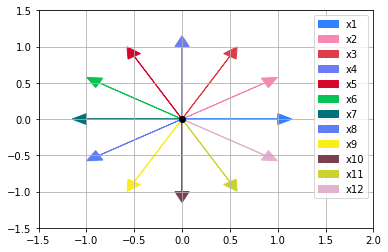

In [53]:
import matplotlib.pyplot as plt

rancolors = np.random.uniform(size=(12,3))

for i in range(12):
    plt.arrow(0,0,X[0][i],X[1][i],head_width=0.15,head_length=0.15,color=rancolors[i],label='x'+str(i+1))

plt.plot(0,0,'ok')
plt.xlim(-1.5, 2)
plt.ylim(-1.5, 1.5)
plt.grid(b=True, which='major')
plt.legend()
plt.show()

### c)

Multiplying each vector with $V^T$ means matrix multiplying $V^T$ with directly $X$ since each column of $X$ correspond to one vector. The multiplied version of $x_i$ is in the $i$th column of $X_1$ in my implementation.

In [54]:
X1 = V.T @ X
print('Resulting matrix:\n', X1)

Resulting matrix:
 [[-0.19343136 -0.65807338 -0.94638516 -0.98111381 -0.7529538  -0.32304043
   0.19343136  0.65807338  0.94638516  0.98111381  0.7529538   0.32304043]
 [-0.98111381 -0.7529538  -0.32304043  0.19343136  0.65807338  0.94638516
   0.98111381  0.7529538   0.32304043 -0.19343136 -0.65807338 -0.94638516]]


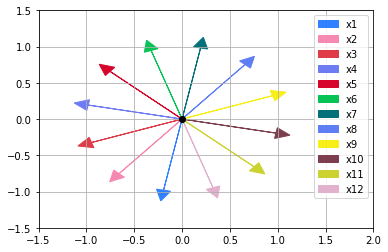

In [55]:
for i in range(12):
    plt.arrow(0,0,X1[0][i],X1[1][i],head_width=0.15,head_length=0.15,color=rancolors[i],label='x'+str(i+1))

plt.plot(0,0,'ok')
plt.xlim(-1.5, 2)
plt.ylim(-1.5, 1.5)
plt.grid(b=True, which='major')
plt.legend()
plt.show()

### d)

Multiplying each vector with $S$ means matrix multiplying $S$ with directly $X_1$ since each column of $X_1$ correspond to one vector. The multiplied version of $x_i$ is in the $i$th column of $X_2$ in my implementation.

In [56]:
X2 = S @ X1
print('Resulting matrix:\n', X2)

Resulting matrix:
 [[-1.26216354 -4.29401017 -6.17528023 -6.40188895 -4.91311669 -2.10787878
   1.26216354  4.29401017  6.17528023  6.40188895  4.91311669  2.10787878]
 [-0.63792099 -0.48957117 -0.21004115  0.12576923  0.42787984  0.6153404
   0.63792099  0.48957117  0.21004115 -0.12576923 -0.42787984 -0.6153404 ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]]


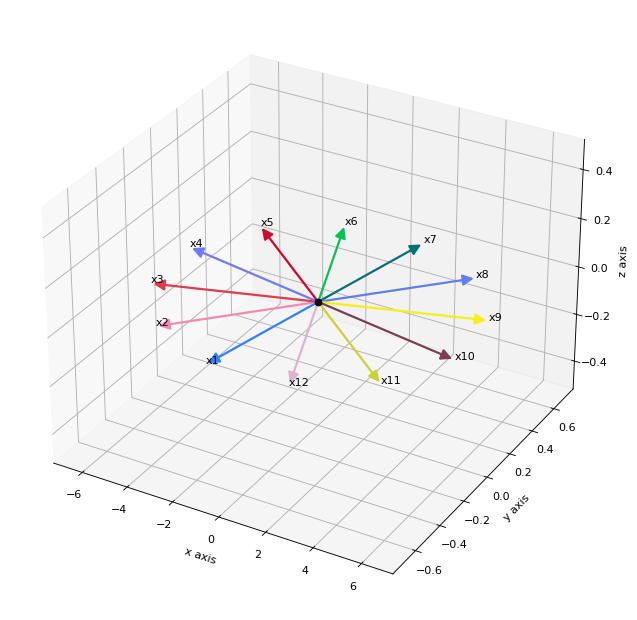

In [57]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)


fig = plt.figure(figsize=(10,10), dpi=80)
ax = fig.add_subplot(projection='3d')

for i in range(12):
    vector = Arrow3D([0, X2[0,i]], [0, X2[1,i]], [0, X2[2,i]], mutation_scale=20, lw=2, \
                     arrowstyle="-|>", color=rancolors[i], label='x'+str(i+1))
    ax.add_artist(vector)
    ax.text(X2[0,i], X2[1,i], X2[2,i], 'x'+str(i+1), color='black')

ax.plot(0,0,'ok')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.set_xlim([-7, 7])
ax.set_ylim([-0.75, 0.75])
ax.set_zlim([-0.5, 0.5])
plt.show()

### e)

Multiplying each vector with $U$ means matrix multiplying $U$ with directly $X_2$ since each column of $X_2$ correspond to one vector. The multiplied version of $x_i$ is in the $i$th column of $X_3$ in my implementation.

In [58]:
X3 = U @ X2
print('Resulting matrix:\n', X3)

Resulting matrix:
 [[ 1.00000000e+00  3.86602540e+00  5.69615242e+00  6.00000000e+00
   4.69615242e+00  2.13397460e+00 -1.00000000e+00 -3.86602540e+00
  -5.69615242e+00 -6.00000000e+00 -4.69615242e+00 -2.13397460e+00]
 [-5.19029264e-15 -5.00000000e-01 -8.66025404e-01 -1.00000000e+00
  -8.66025404e-01 -5.00000000e-01  4.60742555e-15  5.00000000e-01
   8.66025404e-01  1.00000000e+00  8.66025404e-01  5.00000000e-01]
 [-1.00000000e+00 -1.86602540e+00 -2.23205081e+00 -2.00000000e+00
  -1.23205081e+00 -1.33974596e-01  1.00000000e+00  1.86602540e+00
   2.23205081e+00  2.00000000e+00  1.23205081e+00  1.33974596e-01]]


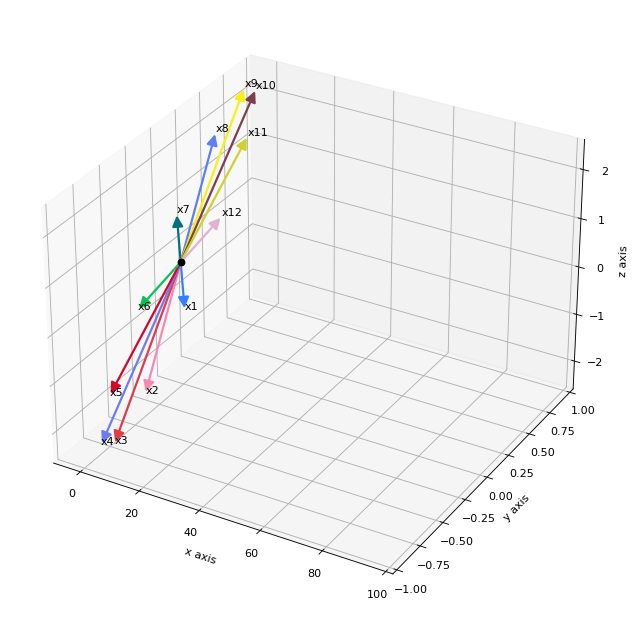

In [59]:
fig = plt.figure(figsize=(10,10), dpi=80)
ax = fig.add_subplot(projection='3d')

for i in range(12):
    vector = Arrow3D([0, X3[0,i]], [0, X3[1,i]], [0, X3[2,i]], mutation_scale=20, lw=2, \
                     arrowstyle="-|>", color=rancolors[i], label='x'+str(i+1))
    ax.add_artist(vector)
    ax.text(X3[0,i], X3[1,i], X3[2,i], 'x'+str(i+1), color='black')

ax.plot(0,0,'ok')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.set_xlim([-7, 100])
ax.set_ylim([-1, 1])
ax.set_zlim([-2.5, 2.5])
plt.show()

### f)

To show as reference, I first plot $X$ again.

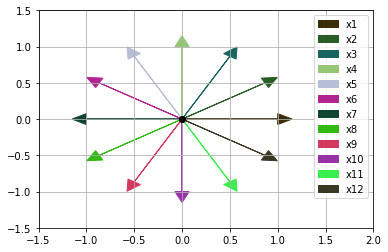

In [60]:
rancolors = np.random.uniform(size=(12,3))

for i in range(12):
    plt.arrow(0,0,X[0][i],X[1][i],head_width=0.15,head_length=0.15,color=rancolors[i],label='x'+str(i+1))

plt.plot(0,0,'ok')
plt.xlim(-1.5, 2)
plt.ylim(-1.5, 1.5)
plt.grid(b=True, which='major')
plt.legend()
plt.show()

Now, I multiply $V^T$ and $X$ and call the result $\hat{X}_1$. The result should be the same as above version.

In [61]:
Xhat1 = V.T @ X
print('Resulting matrix:\n', Xhat1)

Resulting matrix:
 [[-0.19343136 -0.65807338 -0.94638516 -0.98111381 -0.7529538  -0.32304043
   0.19343136  0.65807338  0.94638516  0.98111381  0.7529538   0.32304043]
 [-0.98111381 -0.7529538  -0.32304043  0.19343136  0.65807338  0.94638516
   0.98111381  0.7529538   0.32304043 -0.19343136 -0.65807338 -0.94638516]]


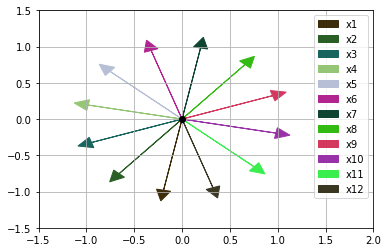

In [62]:
for i in range(12):
    plt.arrow(0,0,Xhat1[0][i],Xhat1[1][i],head_width=0.15,head_length=0.15,color=rancolors[i],label='x'+str(i+1))

plt.plot(0,0,'ok')
plt.xlim(-1.5, 2)
plt.ylim(-1.5, 1.5)
plt.grid(b=True, which='major')
plt.legend()
plt.show()

Since this version is a rank $1$ approximation, we modify $S$. We leave its first singular value as it is and make all other singular value entries $0$. We call this modified version $\hat{S}_1$. The result of multiplying $\hat{S}_1$ and $\hat{X}_1$ is stored in $\hat{X}_2$.

In [63]:
Shat1 = S.copy()
for i in range(1, len(sigmas)):
    Shat1[i,i] = 0

Xhat2 = Shat1 @ Xhat1
print('Resulting matrix:\n', Xhat2)

Resulting matrix:
 [[-1.26216354 -4.29401017 -6.17528023 -6.40188895 -4.91311669 -2.10787878
   1.26216354  4.29401017  6.17528023  6.40188895  4.91311669  2.10787878]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]]


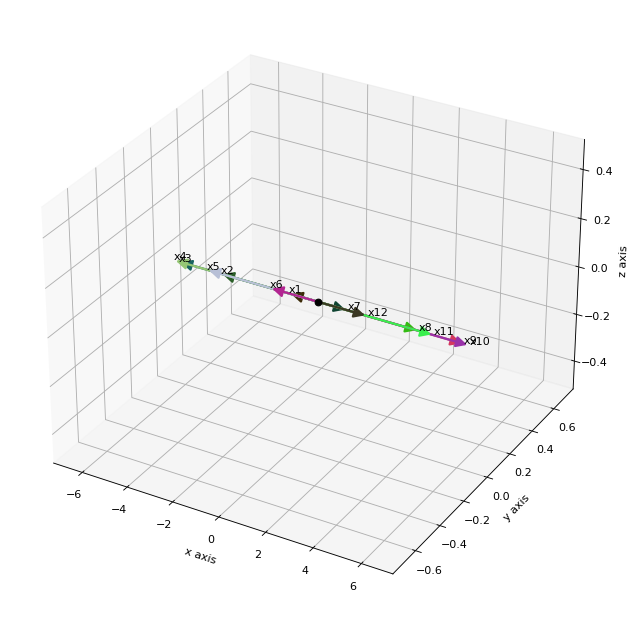

In [64]:
fig = plt.figure(figsize=(10,10), dpi=80)
ax = fig.add_subplot(projection='3d')

for i in range(12):
    vector = Arrow3D([0, Xhat2[0,i]], [0, Xhat2[1,i]], [0, Xhat2[2,i]], mutation_scale=20, lw=2, \
                     arrowstyle="-|>", color=rancolors[i], label='x'+str(i+1))
    ax.add_artist(vector)
    ax.text(Xhat2[0,i], Xhat2[1,i], Xhat2[2,i], 'x'+str(i+1), color='black', fontsize=10)

ax.plot(0,0,'ok')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.set_xlim([-7, 7])
ax.set_ylim([-0.75, 0.75])
ax.set_zlim([-0.5, 0.5])
plt.show()

Lastly, I multiply $U$ with $\hat{X}_2$ to get the resulting vector $\hat{X}_3$.

In [65]:
Xhat3 = U @ Xhat2
print('Resulting matrix:\n', Xhat3)

Resulting matrix:
 [[ 1.17608476  4.0011613   5.75412989  5.96528403  4.57804513  1.96412274
  -1.17608476 -4.0011613  -5.75412989 -5.96528403 -4.57804513 -1.96412274]
 [-0.18977818 -0.64564488 -0.92851155 -0.96258431 -0.73873338 -0.31693943
   0.18977818  0.64564488  0.92851155  0.96258431  0.73873338  0.31693943]
 [-0.41697205 -1.41858178 -2.04008368 -2.1149468  -1.62311163 -0.69636501
   0.41697205  1.41858178  2.04008368  2.1149468   1.62311163  0.69636501]]


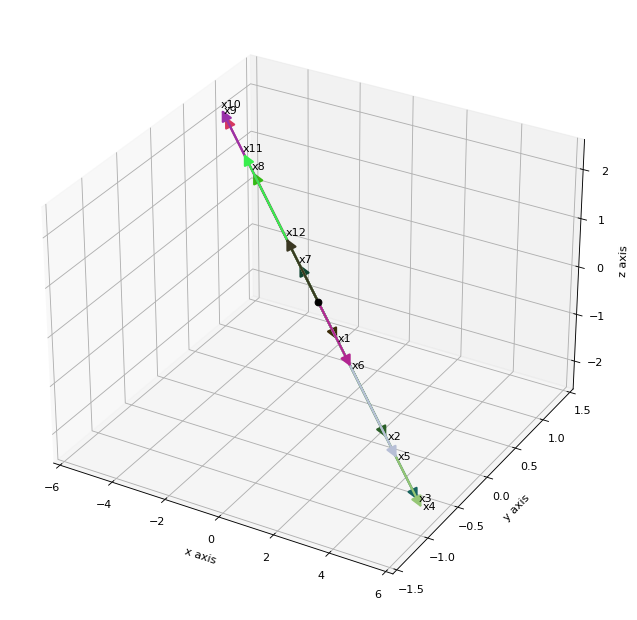

In [66]:
fig = plt.figure(figsize=(10,10), dpi=80)
ax = fig.add_subplot(projection='3d')

for i in range(12):
    vector = Arrow3D([0, Xhat3[0,i]], [0, Xhat3[1,i]], [0, Xhat3[2,i]], mutation_scale=20, lw=2, \
                     arrowstyle="-|>", color=rancolors[i], label='x'+str(i+1))
    ax.add_artist(vector)
    ax.text(Xhat3[0,i], Xhat3[1,i], Xhat3[2,i], 'x'+str(i+1), color='black', fontsize=10)

ax.plot(0,0,'ok')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.set_xlim([-6, 6])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-2.5, 2.5])
plt.show()

### g)

If we take a close look at the resulting vectors in **2e** and the result with approximation in **2f**, the relative magnitudes of the vectors in **2e** are well preserved in the rank $1$ approximation. To make a deeper comment, we look at the residual matrix $\hat{X}_3 - X_3$.

In [67]:
print('Residual matrix between X_3 and Xhat_3:\n', Xhat3 - X3)

Residual matrix between X_3 and Xhat_3:
 [[ 0.17608476  0.13513589  0.05797747 -0.03471597 -0.11810729 -0.16985186
  -0.17608476 -0.13513589 -0.05797747  0.03471597  0.11810729  0.16985186]
 [-0.18977818 -0.14564488 -0.06248615  0.03741569  0.12729203  0.18306057
   0.18977818  0.14564488  0.06248615 -0.03741569 -0.12729203 -0.18306057]
 [ 0.58302795  0.44744362  0.19196713 -0.1149468  -0.39106082 -0.56239042
  -0.58302795 -0.44744362 -0.19196713  0.1149468   0.39106082  0.56239042]]


As it is seen, all the entries are below $0.6$ in the residual matrix, meaning that the result from original $A$ and rank $1$ approximation $\hat{A}_1$ are actually close to each other. Therefore, the absolute magnitudes of the resulting vectors are also preserved to some extent. But their direction information are generally lost since the result vectors with rank $1$ approximation are all on the same line, spanning only $1$ dimension in the $3$ dimensional space. But the actual $A$ matrix is a rank $2$ matrix, meaning it can span a 2 dimensional space. As if we can see from the final plot of $USV^Tx$, it really spans 2 dimensional vector since all the vectors are lying on the same plane. Therefore, the rank $1$ approximation tried to approximate the vectors of $Ax$ in $2$ dimensional space using only $1$ dimension, but it could not give the whole correct directions of the vectors, just kind of projected them on a single line. So it is an information loss since we used only $1$ singular value. But the rank $1$ approximation can be seen as a summary since the magnitudes of the approximated vectors are very close to original vector. 

## Question 3

### a)

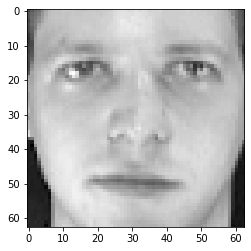

In [68]:
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()
A_1 = faces["images"][0][:63, :63]
A_2 = faces["images"][110][:63, :63]
A_3 = faces["images"][365][:63, :63]
plt.imshow(A_1, cmap="gray");

### b)

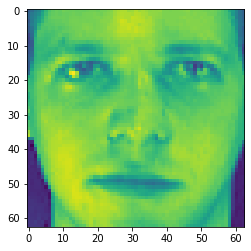

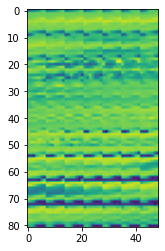

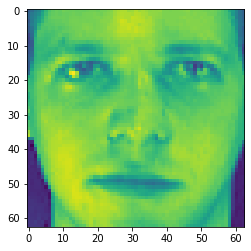

In [69]:
# takes 81x49 patched image matrix and turns it into 63x63 image
def create_face(B):
    return B.reshape(9,9,7,7).swapaxes(1,2).reshape(63,63)

# takes 63x63 image and turns it into 81x49 pathched image matrix
def create_patches(A):
    return A.reshape(9,7,9,7).swapaxes(1,2).reshape(81,49)

# test if the above fucntions are working correctly
plt.imshow(A_1);
plt.figure()
plt.imshow(create_patches(A_1));
plt.figure()
plt.imshow(create_face(create_patches(A_1)));

In [70]:
B_1 = create_patches(A_1)
B_2 = create_patches(A_2)
B_3 = create_patches(A_3)

print('B_1 and its shape:', B_1.shape, '\n', B_1)
print('B_2 and its shape:', B_2.shape, '\n', B_2)
print('B_3 and its shape:', B_3.shape, '\n', B_3)

B_1 and its shape: (81, 49) 
 [[0.30991736 0.3677686  0.41735536 ... 0.6570248  0.6446281  0.6528926 ]
 [0.677686   0.69008267 0.6859504  ... 0.6859504  0.6942149  0.6942149 ]
 [0.69008267 0.6942149  0.69008267 ... 0.71487606 0.71487606 0.71900827]
 ...
 [0.73140496 0.74793386 0.72727275 ... 0.58677685 0.56198347 0.5495868 ]
 [0.6652893  0.6487603  0.6280992  ... 0.6322314  0.6446281  0.6652893 ]
 [0.58264464 0.59917355 0.5206612  ... 0.15289256 0.14876033 0.16115703]]
B_2 and its shape: (81, 49) 
 [[0.48347107 0.5206612  0.59090906 ... 0.6446281  0.6652893  0.677686  ]
 [0.74380165 0.78099173 0.78512394 ... 0.78099173 0.7892562  0.7892562 ]
 [0.7933884  0.79752064 0.7933884  ... 0.8140496  0.822314   0.8305785 ]
 ...
 [0.6983471  0.6942149  0.7066116  ... 0.446281   0.5041322  0.54545456]
 [0.38016528 0.38016528 0.47107437 ... 0.54545456 0.5289256  0.5206612 ]
 [0.4876033  0.47107437 0.3181818  ... 0.1446281  0.1322314  0.13636364]]
B_3 and its shape: (81, 49) 
 [[0.38016528 0.2314049

### c)

We directly use the **np.linalg.svd()** to get the singular value decomposition. We remember that the third value returned from this function is actually $V^T$, therefore we define that matrix as $V_{1_{transpose}}$. In upcoming questions, I will take the $i$th column of $V_1$ as the $i$th row of $V_{1_{transpose}}$. $U$ is defined as $U_1$.

In [71]:
U_1, sigmas_1, V_1_transpose = np.linalg.svd(B_1)
print('First 10 singular values:\n', sigmas_1[:10])

First 10 singular values:
 [41.163345    3.8393824   1.9943997   1.3196774   1.183775    0.97274166
  0.8572861   0.712525    0.6731111   0.61996824]


### d)

#### First Column of V

Below, I printed the first column of $V$ as $7x7$ matrix and showed it as image.

First column of V_1 as image:
 [[-0.14408784 -0.14447182 -0.1450582  -0.14533705 -0.14499101 -0.14292835
  -0.1425066 ]
 [-0.14218433 -0.14273535 -0.14407901 -0.14377537 -0.14375025 -0.14205927
  -0.14088675]
 [-0.14164184 -0.14215714 -0.14360122 -0.14209975 -0.14226754 -0.14240748
  -0.14112543]
 [-0.14178438 -0.14199284 -0.14334995 -0.14186463 -0.14156194 -0.14237314
  -0.14133936]
 [-0.14277509 -0.14277172 -0.14358482 -0.14297152 -0.1427872  -0.14287396
  -0.14151803]
 [-0.14305544 -0.14333813 -0.14343134 -0.14371659 -0.14298514 -0.14237507
  -0.14171414]
 [-0.1430732  -0.14343058 -0.1434343  -0.14435501 -0.14368585 -0.1418981
  -0.14162068]]


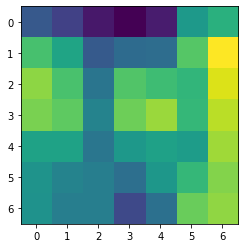

In [72]:
col_1 = np.reshape(V_1_transpose[0], (7,7))
print('First column of V_1 as image:\n', col_1)
plt.imshow(col_1)

It is very hard to interpret this image as a component of the original image $A_1$. But I will use SVD properties to make a comment about it. We know = $B_1 = \sum_{i=1}^{49} \sigma_i u_i v_i^T$. The only contribution of any $v_i$ to the image comes from the $i$th iteration of this summation as the scaled outer product $\sigma_i u_i v_i^T$. Call this product $B_{1_i}$. Each $j$th row of $B_{1_i}$ is constructed as the scalar product $\sigma_i u_{i_j} v_i^T$. That means each row of $B_{1_i}$ is a scaled version of $v_i^T$, the $i$th column of $V$. And each row of $B_{1_i}$ actually corresponds to a $7x7$ patch in the original shape of the image. Therefore, if we convert $B_{1_i}$ to the original shape of the image, we can see how the $i$th column of $V$ contribute to the whole image since each patch in the image is just a scaled and may be negated version of $v_i$.

I will make a comment about first column of $V$ after constructing the image as described above. For this part, I also print the first column of $U$ to see how the first column of $V$ is scaled in each patch.

First column of U:
 [-0.08831565 -0.11699861 -0.12062906 -0.12769882 -0.13332483 -0.12383411
 -0.12253757 -0.12084156 -0.08898665 -0.08959109 -0.1089802  -0.10632627
 -0.11948438 -0.12671036 -0.11649469 -0.10267911 -0.11166371 -0.09231108
 -0.10432209 -0.10916065 -0.08466047 -0.10251407 -0.12277003 -0.1033632
 -0.08781109 -0.09430415 -0.10357413 -0.11344877 -0.11869375 -0.11057399
 -0.11077143 -0.11927997 -0.10777097 -0.10463268 -0.11236949 -0.11329369
 -0.1172851  -0.12413188 -0.12136567 -0.11825238 -0.12154366 -0.1178058
 -0.11750234 -0.11933854 -0.1124446  -0.09906856 -0.133356   -0.1258557
 -0.11505874 -0.12073641 -0.10810205 -0.12576461 -0.12645951 -0.10384838
 -0.06747974 -0.13625036 -0.12798224 -0.11565004 -0.10682109 -0.11391423
 -0.12653215 -0.12567942 -0.07553274 -0.03559952 -0.12938175 -0.12747312
 -0.10849147 -0.09467648 -0.09459661 -0.11818167 -0.11548007 -0.0569787
 -0.03303501 -0.11353639 -0.12960704 -0.12826146 -0.11540929 -0.1181308
 -0.11418477 -0.10063515 -0.05836317

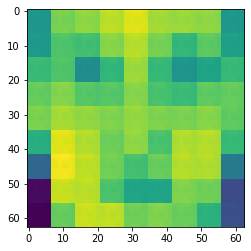

In [73]:
print('First column of U:\n', U_1[:,0])
print('\nsigma_1 * u_1 v_1^T:')
plt.imshow(create_face(sigmas_1[0] * np.outer(U_1[:, 0], V_1_transpose[0])))

It is easier to see now how $v_1$ contributed. The background structure of the original face image is constructed by $B_{1_1}$ as it is seen. Any detail about the face is not clear but the transition of the colors and overall borders of the face is interpretable and understandable. All this image is obtained by scaling and negating first column of $V$ in the patches, thus, we can say that the first column of $V$ holds information about the background structure of colors and borders of the face and interprets these properties.

#### Second column of V

Below, I printed the second column of $V$ as $7x7$ matrix and showed it as image.

Second column of V_1 as image:
 [[-0.15700242 -0.13760571 -0.09123763  0.03644531  0.09492502  0.15563682
   0.18758361]
 [-0.16211781 -0.14191477 -0.09099123  0.02128635  0.10502174  0.16336331
   0.19269663]
 [-0.19824159 -0.16289638 -0.0954462   0.00812514  0.11131942  0.15447783
   0.19138221]
 [-0.21129614 -0.18846707 -0.09421724  0.00464872  0.11037574  0.15316811
   0.18750013]
 [-0.20173006 -0.18899964 -0.09916852  0.0059544   0.10241728  0.14866711
   0.18490897]
 [-0.19985391 -0.1836565  -0.10942712  0.02082087  0.09061451  0.14740376
   0.18252599]
 [-0.18985926 -0.17029403 -0.11081228  0.03608373  0.07915679  0.14568537
   0.17905326]]


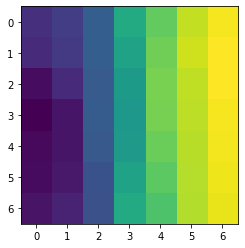

In [74]:
col_2 = np.reshape(V_1_transpose[1], (7,7))
print('Second column of V_1 as image:\n', col_2)
plt.imshow(col_2)

It is clear to see the transition of colors from left to right in this image of $v_2^T$. The values in the rightmost columns are positive but the ones in the leftmost columns are negative. But it is again hard to understand what this transition corresponds to in the original image. Therefore, I will make use of the same ideas I used while interpreting the first column of $V$.

Again, $B_1 = \sum_{i=1}^{49} \sigma_i u_i v_i^T$ and we know the only contribution of $v_2$ to the image comes from the term $\sigma_2 u_2 v_2^T$. Call this $B_{1_2}$. I explained how this term is useful in the first part, so I will not go into detail here since the derivation is the same.

I will make a comment about second column of $V$ after constructing the image as described above. For this part, I also print the second column of $U$ to see how the second column of $V$ is scaled in each patch.

Second column of U:
 [ 0.21448809  0.02028232  0.00812205  0.05045969 -0.0071622  -0.0279897
  0.01178987 -0.02110082 -0.20880178  0.2092921   0.01372274  0.01211631
  0.05100678 -0.00430849 -0.07024195  0.02903862  0.01332685 -0.16997877
  0.1613368  -0.01600758  0.01353834  0.12568851  0.01091112 -0.08476128
 -0.09746264  0.03204549 -0.0322247   0.05907828  0.03375633 -0.02758556
  0.03201639  0.0338669  -0.08328612  0.01838054  0.00732701 -0.02982384
  0.09299176 -0.01096531  0.00865015 -0.05086023  0.04947811 -0.02804052
 -0.00497735  0.00383938 -0.06502504  0.3127967   0.00178877 -0.02648177
 -0.03394697 -0.00701482  0.04108164  0.00083363 -0.0125396  -0.15806948
  0.40359953  0.02452628 -0.04327185 -0.05312197  0.01347332  0.04827519
  0.01353269 -0.03117377 -0.37022665  0.06425774  0.09398369 -0.08608337
 -0.0656465  -0.03423074  0.04352492  0.06650624 -0.0655378  -0.32805967
 -0.01804908  0.08213593  0.03440308 -0.03453837 -0.00926523  0.02528453
 -0.04655065  0.01386685 -0.369

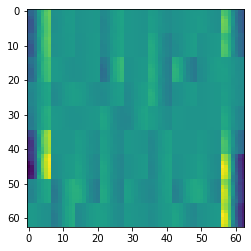

In [75]:
print('Second column of U:\n', U_1[:,1])
print('\nsigma_2 * u_2 v_2^T:')
plt.imshow(create_face(sigmas_1[1] * np.outer(U_1[:, 1], V_1_transpose[1])))

It is easier to see now how $v_2$ contributed. This component of the image focuses extensively on the borders of the face and the areas in the image that does not belong to face but to the beckground. We see also that the magnitudes of the entries in the bottom left and bottom right area of the image are large, meaning the non-face areas are constructed carefully in these regions using the second column of $V$. All this image is obtained by scaling and negating second column of $V$ in the patches, thus, we can say that the second column of $V$ holds information about the details of the borders of the face and the regions in the image that are outside the face template. It interprets these properties in its column plot.

#### Third column of V

Below, I printed the third column of $V$ as $7x7$ matrix and showed it as image.

Third column of V_1 as image:
 [[-0.2140205  -0.20635    -0.18166755 -0.21235073 -0.20701756 -0.18347324
  -0.16381137]
 [-0.20841385 -0.20125881 -0.17603381 -0.19457683 -0.19045448 -0.1545389
  -0.16724028]
 [-0.08901393 -0.08121662 -0.07240442 -0.08332592 -0.07325049 -0.03309628
  -0.07004075]
 [ 0.01792763  0.05267146  0.01308391  0.02014817  0.01948407  0.0372466
   0.03456408]
 [ 0.08772728  0.12270251  0.09249602  0.11536565  0.11212409  0.09431767
   0.09333798]
 [ 0.12800427  0.14671928  0.14891388  0.16275464  0.17280425  0.15009551
   0.1540971 ]
 [ 0.1386487   0.14888184  0.18199183  0.17643712  0.19683875  0.17740795
   0.1765731 ]]


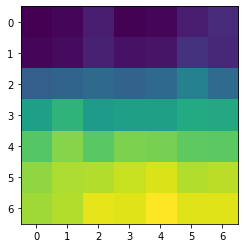

In [76]:
col_3 = np.reshape(V_1_transpose[2], (7,7))
print('Third column of V_1 as image:\n', col_3)
plt.imshow(col_3)

It is clear to see the transition of colors from up to down in this image of $v_3^T$. The values in the upper rows are negative but the ones in the down rows are positive. But it is again hard to understand what this transition corresponds to in the original image. Therefore, I will make use of the same ideas I used while interpreting the first column of $V$.

Again, $B_1 = \sum_{i=1}^{49} \sigma_i u_i v_i^T$ and we know the only contribution of $v_3$ to the image comes from the term $\sigma_3 u_3 v_3^T$. Call this $B_{1_3}$. I explained how this term is useful in the first part, so I will not go into detail here since the derivation is the same.

I will make a comment about third column of $V$ after constructing the image as described above. For this part, I also print the third column of $U$ to see how the third column of $V$ is scaled in each patch.

Third column of U:
 [ 0.10867625 -0.01499015  0.02183514  0.03001955  0.0301802  -0.01536721
 -0.00692172  0.01398887  0.02168822  0.01541783 -0.02067864 -0.16529189
 -0.08125523 -0.03720406 -0.07899522 -0.21230239 -0.13059926 -0.01455594
  0.1957251  -0.10785981  0.10532368 -0.11351927 -0.02272319 -0.13309537
  0.12312481 -0.03376735  0.10806468  0.00656275 -0.02477965  0.05697155
  0.15449555  0.00686899  0.0931055   0.06630098  0.00656671  0.01700762
  0.01870937  0.06180083  0.05054059 -0.01515568  0.06415012 -0.003551
  0.07347926  0.03847548 -0.03028214 -0.27575424  0.03921738  0.03291851
 -0.04595607 -0.06563545  0.00909608  0.05010072  0.02387472 -0.1325211
 -0.12107928 -0.00553289  0.01869626 -0.05821497 -0.13811792  0.02464854
 -0.02276628 -0.02651541 -0.22493853 -0.12041685 -0.08637506  0.18414626
  0.39185438  0.33940387  0.34476826  0.10471721 -0.11489557 -0.05372842
  0.00705702  0.00663818 -0.08054042 -0.06327994 -0.07591848 -0.06945994
 -0.10820525 -0.00453667 -0.027798

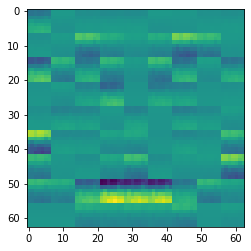

In [77]:
print('Third column of U:\n', U_1[:,2])
print('\nsigma_3 * u_3 v_3^T:')
plt.imshow(create_face(sigmas_1[2] * np.outer(U_1[:, 2], V_1_transpose[2])))

It is easier to see now how $v_3$ contributed. This component of the image focuses more on the smaller details of the face. As we can see, magnitudes are somewhat gathered in the eye regions in the upper part of the image. This means the general structure of eyes are constructed by this component of the image. In the down parts, we see a strong focus and very sharp magnitudes in the mouth region. The core structure and details of the mouth and lips in the image are constructed by this component in the image. All this image is obtained by scaling and negating third column of $V$ in the patches, thus, we can say that the third column of $V$ holds information about the eyes and especially the mouth of the face in the original image. It interprets these properties in its column plot.

### e)

The rank $r$ approximation is given as $\sum_{k=1}^r \sigma_k u_k v_k^T$. I first get the rank $1$ approximation as below and store the iterated result in variable **matrix** to use it in higher approximations directly.

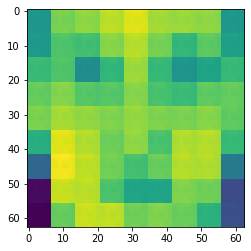

In [78]:
matrix = np.zeros(B_1.shape)
for rank in range(1):
    matrix += sigmas_1[rank] * np.outer(U_1[:, rank], V_1_transpose[rank])

B_1rank1 = matrix

A_1rank1 = create_face(B_1rank1)
plt.imshow(A_1rank1)

Then, I get the rank $5$ approximation as follows.

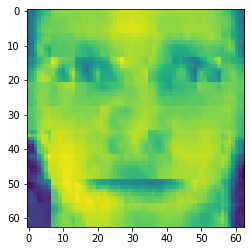

In [79]:
for rank in range(1,5):
    matrix += sigmas_1[rank] * np.outer(U_1[:, rank], V_1_transpose[rank])

B_1rank5 = matrix

A_1rank5 = create_face(B_1rank5)
plt.imshow(A_1rank5)

Then, I get the rank $10$ approximation as follows.

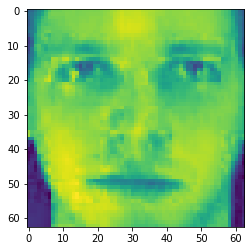

In [80]:
for rank in range(5,10):
    matrix += sigmas_1[rank] * np.outer(U_1[:, rank], V_1_transpose[rank])

B_1rank10 = matrix

A_1rank10 = create_face(B_1rank10)
plt.imshow(A_1rank10)

Lastly, I get the rank $20$ approximation.

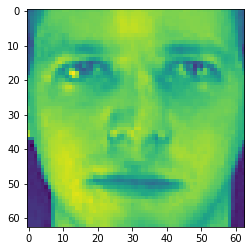

In [81]:
for rank in range(10,20):
    matrix += sigmas_1[rank] * np.outer(U_1[:, rank], V_1_transpose[rank])

B_1rank20 = matrix

A_1rank20 = create_face(B_1rank20)
plt.imshow(A_1rank20)

### f)

To store the original image $A_i$ for $i = 1,2,3$, we need $63 \times 63 = 3969$ parameters. We then transform each matrix $A_i$ to $81 \times 49$ matrix $B_i$ which again has $81 \times 49 = 3969$ parameters.

When calculating the $k$th order approximation of $B_i$, we do the summation $\sum_{j=1}^k \sigma_j u_j v_j^T$ where $\sigma_j$ is the $j$th singular value of $B_i$, $u_j$ is the $j$th column of $U_i$ and $v_j$ is the $j$th column of $V_i$. To do this summation, we actually only need the first $k$ columns of $U_i$ and $V_i$. We also only need the first $k$ singular values. Given than we are using a sparse representation of matrices, we can take $B_i = U_i \Sigma_i V_i^T$ and make all the columns $u_j$, $v_j$ where $j > k$ an array for $0$s for the $k$th order approximation. Also, for all singular values $\sigma_j = 0$ if $j > k$. Therefore, we only store the rest of the parameters that are nonzero.

We also acknowledge that $U_i$ is a $81x81$ matrix and $V_i$ is a $49x49$ matrix.

For the rank $1$ approximation, we take first $1$ columns of $U_i$ and $V_i$. And we take the first $1$ singular value. Therefore, we store

$(1 \times 81 + 1 \times 49 + 1) = 131$ parameters.

This corresponds to a fraction of $\dfrac{131}{3969} = 0.03300579$ parameters relative to original image.

For the rank $5$ approximation, we take first $5$ columns of $U_i$ and $V_i$. And we take the first $5$ singular values. Therefore, we store

$(5 \times 81 + 5 \times 49 + 5) = 655$ parameters.

This corresponds to a fraction of $\dfrac{655}{3969} = 0.16502897455278406$ parameters relative to original image.

For the rank $10$ approximation, we take first $10$ columns of $U_i$ and $V_i$. And we take the first $10$ singular values. Therefore, we store

$(10 \times 81 + 10 \times 49 + 10) = 1310$ parameters.

This corresponds to a fraction of $\dfrac{1310}{3969} = 0.3300579491055681$ parameters relative to original image.

For the rank $20$ approximation, we take first $20$ columns of $U_i$ and $V_i$. And we take the first $20$ singular values. Therefore, we store

$(20 \times 81 + 20 \times 49 + 20) = 2620$ parameters.

This corresponds to a fraction of $\dfrac{2620}{3969} = 0.6601158982111363$ parameters relative to original image.

We obviously save considerable amount of space by using these approximations and still have much information about the image since especially rank $10$ and $20$ approximations are very similar and close to the original image.

### g)

We first take the first $20$ columns of $V_1$ call it as $V_{1,(20)}$.

In [82]:
V_1_20 = V_1_transpose.T[:,:20]
print('First 20 columns of V_1:\n', V_1_20)

First 20 columns of V_1:
 [[-1.44087836e-01 -1.57002419e-01 -2.14020506e-01 -4.17038016e-02
  -2.05572903e-01 -3.08488011e-01 -7.78296292e-02 -2.70024240e-01
   1.28780603e-01 -6.87123742e-03  2.52270639e-01 -3.00425421e-02
   8.23481083e-02 -1.73957825e-01  7.51265511e-02 -2.13027615e-02
   1.04269341e-01 -2.02947706e-01  1.81034088e-01 -2.14326188e-01]
 [-1.44471824e-01 -1.37605712e-01 -2.06349999e-01 -5.21706790e-02
  -9.66610163e-02 -2.66051799e-01 -1.04477992e-02 -1.08510658e-01
   6.23592734e-02 -9.28287208e-02  3.93219851e-02 -1.01720110e-01
   1.06446274e-01  5.06220795e-02  7.06248591e-03 -6.96332827e-02
   2.21490070e-01 -2.18970358e-01  4.04076539e-02  2.73941576e-01]
 [-1.45058200e-01 -9.12376270e-02 -1.81667551e-01  2.48706527e-02
   4.40751296e-03 -3.15595776e-01  8.71129334e-02  4.94364202e-02
   5.50367013e-02 -2.00452968e-01 -1.69189155e-01 -1.42024900e-03
   2.02081334e-02  2.70023584e-01  4.44459394e-02 -2.15836421e-01
   1.04320623e-01 -5.00069112e-02  8.90541896e-0

Now, take $B_2 = Y_2 V_{1,(20)}^T$. Since $V_{1,(20)}$ is still a matrix with orthonormal columns, it still holds that $V_{1,(20)}^T V_{1,(20)} = I$. We search for the best solution $\hat{Y_2}$ in this system, and we know that $V_{1,(20)}^T$ has a right inverse. Therefore, it holds that $B_2 V_{1,(20)} = Y_2 V_{1,(20)}^T V_{1,(20)} = Y_2$. This solution is somewhat similar a least square solution. Thus, we select the best $Y_2$ as $\hat{Y_2} = B_2 V_{1,(20)}$. By exactly the same arguments, we take $\hat{Y_3} = B_3 V_{1,(20)}$.

In [83]:
Y_2hat = B_2 @ V_1_20
Y_3hat = B_3 @ V_1_20

Since we have now the best values $\hat{Y_2}$ and $\hat{Y_3}$, we can calculate the approximations $\hat{B_2}$ and $\hat{B_3}$. By definition of linear systems, $\hat{B_2} = \hat{Y_2} V_{1,(20)}^T$ and $\hat{B_3} = \hat{Y_3} V_{1,(20)}^T$. We calculate the approximations and print them as images below.

B_2 as face image:


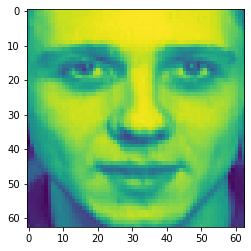

In [84]:
B_2hat = Y_2hat @ V_1_20.T
B_3hat = Y_3hat @ V_1_20.T

print('B_2 as face image:')
plt.imshow(A_2)

B_2hat as face image:


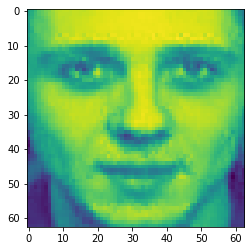

In [85]:
print('B_2hat as face image:')
plt.imshow(create_face(B_2hat))

B_3 as face image:


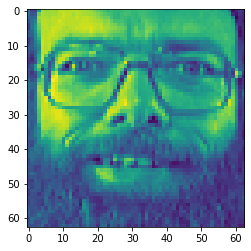

In [86]:
print('B_3 as face image:')
plt.imshow(A_3)

B_3hat as face image:


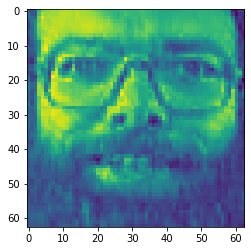

In [87]:
print('B_3hat as face image:')
plt.imshow(create_face(B_3hat))

As we can see, the approximations actually worked very well. It is because of the similarities of the images and thus the similarities of the singular value decompositions of $B_1$ with $B_2$ and $B_3$. All $3$ images given from the dataset are face pictures taken from the same angle and same distance. The key difference between them is the details in the face. In part **3d**, we saw that the first $3$ columns of $V_1$ holds information about different components of the face. For example, the first column was interpreting the overall background structure and colors of the image and the face. But in other images, we notice that the face is seen from the same and distance as the first image, therefore, the first column of $V_2$ and $V_3$ should be very close to $V_1$. The second column of $V_1$ was interpreting the regions of the image outside the face and since the photo angle is so similar in other images, the second column of $V_2$ and $V_3$ should also be similar to $V_1$. Of course, the similarity of columns of $V_2$ and $V_3$ with $V_1$ should decrease as we go through the rightmost columns since the details of the images are different but we surely expect the first couple of columns to be very close to each other. Let us test this claim by calculating the $L_2$ norm between first 20 columns of $V_1$ with the ones of $V_2$ and $V_3$.

In [88]:
U_2,sigmas_2,V_2_transpose = np.linalg.svd(B_2)
U_3,sigmas_3,V_3_transpose = np.linalg.svd(B_3)

norm_12 = np.linalg.norm(V_1_20 - V_2_transpose[:20].T)
norm_13 = np.linalg.norm(V_1_20 - V_3_transpose[:20].T)

print('L2 norm between first 20 columns of V_1 and V_2:', norm_12)
print('L2 norm between first 20 columns of V_1 and V_3:', norm_13)

L2 norm between first 20 columns of V_1 and V_2: 6.3826275
L2 norm between first 20 columns of V_1 and V_3: 5.8505325


These norms are very small difference norms since the compared matrices were $49x20$ large matrices. Therefore, the results support our claim. As a result, this similarity between $V_{1(20)}$ and $V_{2(20)}$ helps us to use $V_{1(20)}$ instead of $V_{2(20)}$ in the $B_2$ approximation while still yielding a very close result $\hat{Y_2} V_{1,(20)}^T$ to the original $B_2$. To be honest, the direct rank $20$ approximation of $B_2$ could give a result very similar to this. Therefore, we kind of obtained a different rank $20$ approximation of $B_2$. The above ideas are completely the same for also $B_3$, so I will not repeat them.

To compare which approximation worked better, I also want the compare them with their original rank $20$ approximations.

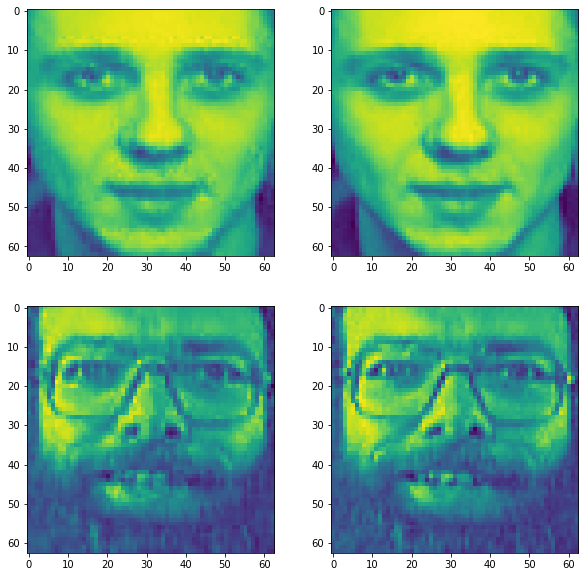

In [89]:
S_2_20 = np.vstack((np.diag(sigmas_2[:20]), np.zeros((61,20))))
S_3_20 = np.vstack((np.diag(sigmas_3[:20]), np.zeros((61,20))))

B_2_20 = U_2 @ S_2_20 @ V_2_transpose[:20]
B_3_20 = U_3 @ S_3_20 @ V_3_transpose[:20]

fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax[0,0].imshow(create_face(B_2hat))
ax[0,1].imshow(create_face(B_2_20))
ax[1,0].imshow(create_face(B_3hat))
ax[1,1].imshow(create_face(B_3_20))

As it can be seen, the approximation $\hat{B_2}$ has worked better than the approximation $\hat{B_3}$, relative to their original rank $20$ approximations. But both of the approximations are worse than the original rank $20$ approximations of $B_2$ and $B_3$ since $V_2$ and $V_3$ are specially optimized for them but we used $V_{1(20)}$ in $\hat{B_2}$ and $\hat{B_3}$. The approximation $\hat{B_2}$ is better than the approximation $\hat{B_3}$ because $A_3$ has actually more facial details in the image than $A_2$. $A_2$ represents a cleaner face with more areas having the same colours and less transitions. However, $A_3$ represents a more detailed image which requires more work to approximate to. Our first image $A_1$ was also a clean face with less details, being close to $A_2$ in that sense. Hence, our approximation $\hat{B_2}$ was better with using $V_{1(20)}$ to approximate $B_2$. Using $V_{1(20)}$ to approximate $B_3$ gave a worse result since $V_{1(20)}$ was not originally optimized for interpreting the glasses, beard, teeth in the first place.